# 基于XGBOOST的租房预测

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

train=pd.read_csv('case2_training.csv')
train=train.copy()
train.head()

,ID,Region,Date,Weekday,Apartment,Beds,Review,Pic Quality,Price,Accept
0,1,4,32,5,1,1,4.526975,0.739994,230.552998,0
1,2,2,87,4,1,1,4.548455,0.862642,348.203425,0
2,3,5,277,5,1,2,4.965732,0.515548,430.462327,0
3,4,3,246,2,1,1,4.752735,0.561547,149.305433,1
4,5,1,155,2,1,2,3.890960,0.817142,165.264184,1


## 特征工程

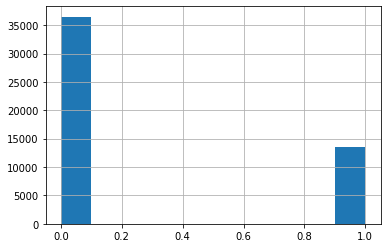

In [2]:
train['Accept'].hist()

In [3]:
#构造新特征
#price_per_review：
def price_per_review(df):
    df['price_per_review'] =  (df["Price"])/ (df["Review"])

price_per_review(train)


train['normalized_price_per_review'] = (train['price_per_review'] - train['price_per_review'].mean()) / (train['price_per_review'].std())
del train['price_per_review']
train.head()

,ID,Region,Date,Weekday,Apartment,Beds,Review,Pic Quality,Price,Accept,normalized_price_per_review
0,1,4,32,5,1,1,4.526975,0.739994,230.552998,0,-0.991450
1,2,2,87,4,1,1,4.548455,0.862642,348.203425,0,0.324016
2,3,5,277,5,1,2,4.965732,0.515548,430.462327,0,0.844153
3,4,3,246,2,1,1,4.752735,0.561547,149.305433,1,-1.993190
4,5,1,155,2,1,2,3.890960,0.817142,165.264184,1,-1.425473


In [4]:
#构造新特征
#price_per_bed：单位bed的价格
def price_per_bed(df):
    df['price_per_bad'] =  (df["Price"])/ (df["Beds"])

price_per_bed(train)


train['normalized_perbed_price'] = (train['price_per_bad'] - train['price_per_bad'].mean()) / (train['price_per_bad'].std())
del train['price_per_bad']
train.head()

,ID,Region,Date,Weekday,Apartment,Beds,Review,Pic Quality,Price,Accept,normalized_price_per_review,normalized_perbed_price
0,1,4,32,5,1,1,4.526975,0.739994,230.552998,0,-0.991450,-0.070105
1,2,2,87,4,1,1,4.548455,0.862642,348.203425,0,0.324016,1.321527
2,3,5,277,5,1,2,4.965732,0.515548,430.462327,0,0.844153,-0.251340
3,4,3,246,2,1,1,4.752735,0.561547,149.305433,1,-1.993190,-1.031145
4,5,1,155,2,1,2,3.890960,0.817142,165.264184,1,-1.425473,-1.819792


In [5]:
#构造新特征
#rev_mul_picqual
def rev_mul_picqual(df):
    df['rev_mul_picqual'] =  (df["Review"])* (df["Pic Quality"])

rev_mul_picqual(train)

train.head()

,ID,Region,Date,Weekday,Apartment,Beds,Review,Pic Quality,Price,Accept,normalized_price_per_review,normalized_perbed_price,rev_mul_picqual
0,1,4,32,5,1,1,4.526975,0.739994,230.552998,0,-0.991450,-0.070105,3.349935
1,2,2,87,4,1,1,4.548455,0.862642,348.203425,0,0.324016,1.321527,3.923689
2,3,5,277,5,1,2,4.965732,0.515548,430.462327,0,0.844153,-0.251340,2.560073
3,4,3,246,2,1,1,4.752735,0.561547,149.305433,1,-1.993190,-1.031145,2.668886
4,5,1,155,2,1,2,3.890960,0.817142,165.264184,1,-1.425473,-1.819792,3.179466


In [6]:
train['normalized_price'] = (train['Price'] - train['Price'].mean()) / (train['Price'].std())
#train['normalized_price'] = (train['Price'] - train['Price'].mean()) / (train['Price'].max() - train['Price'].mean())
#train['normalized_Date'] = (train['Date'] - train['Date'].mean()) / (train['Date'].std())
#train['normalized_review'] = (train['Review'] - train['Review'].mean()) / (train['Review'].std())


#del train['Date']
del train['ID']
#del train['Review']                                                                           
del train['Apartment']
#del train['Weekday']
del train['Price']
#del train['Beds']
                                                                           

train.head()

,Region,Date,Weekday,Beds,Review,Pic Quality,Accept,normalized_price_per_review,normalized_perbed_price,rev_mul_picqual,normalized_price
0,4,32,5,1,4.526975,0.739994,0,-0.991450,-0.070105,3.349935,-0.932707
1,2,87,4,1,4.548455,0.862642,0,0.324016,1.321527,3.923689,0.337202
2,5,277,5,2,4.965732,0.515548,0,0.844153,-0.251340,2.560073,1.225097
3,3,246,2,1,4.752735,0.561547,1,-1.993190,-1.031145,2.668886,-1.809686
4,1,155,2,2,3.890960,0.817142,1,-1.425473,-1.819792,3.179466,-1.637429


In [7]:
def assign_label(hour):
    if hour >=0 and hour < 92:
        return 1
    elif hour >= 92 and hour <183:
        return 2
    elif hour >=183 and hour <275 :
        return 3
    elif hour >= 275 and hour < 366:
        return 4   
    
train["date_label"] = train["Date"].apply(assign_label)
#train["date_label"]=train["date_label"].astype('int')
del train['Date']




#cat_columns = ['Region']
#dummy_df = pd.get_dummies(train[cat_columns])
#train = pd.concat([train, dummy_df], axis=1)
#train = train.drop(cat_columns, axis=1)

train.head()

,Region,Weekday,Beds,Review,Pic Quality,Accept,normalized_price_per_review,normalized_perbed_price,rev_mul_picqual,normalized_price,date_label
0,4,5,1,4.526975,0.739994,0,-0.991450,-0.070105,3.349935,-0.932707,1
1,2,4,1,4.548455,0.862642,0,0.324016,1.321527,3.923689,0.337202,1
2,5,5,2,4.965732,0.515548,0,0.844153,-0.251340,2.560073,1.225097,4
3,3,2,1,4.752735,0.561547,1,-1.993190,-1.031145,2.668886,-1.809686,3
4,1,2,2,3.890960,0.817142,1,-1.425473,-1.819792,3.179466,-1.637429,2


In [8]:
#将原训练集里代表类别的特征‘Region’独热编码处理
dum=pd.get_dummies(train['Region'],prefix="Region")
train=pd.concat([train,dum],axis=1)
del train['Region']

train.head()

,Weekday,Beds,Review,Pic Quality,Accept,normalized_price_per_review,normalized_perbed_price,rev_mul_picqual,normalized_price,date_label,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,Region_10
0,5,1,4.526975,0.739994,0,-0.991450,-0.070105,3.349935,-0.932707,1,0,0,0,1,0,0,0,0,0,0
1,4,1,4.548455,0.862642,0,0.324016,1.321527,3.923689,0.337202,1,0,1,0,0,0,0,0,0,0,0
2,5,2,4.965732,0.515548,0,0.844153,-0.251340,2.560073,1.225097,4,0,0,0,0,1,0,0,0,0,0
3,2,1,4.752735,0.561547,1,-1.993190,-1.031145,2.668886,-1.809686,3,0,0,1,0,0,0,0,0,0,0
4,2,2,3.890960,0.817142,1,-1.425473,-1.819792,3.179466,-1.637429,2,1,0,0,0,0,0,0,0,0,0


In [9]:
#将原训练集里代表类别的特征‘Weekday’独热编码处理
dum=pd.get_dummies(train['Weekday'],prefix="Weekday")
train=pd.concat([train,dum],axis=1)
del train['Weekday']

train.head()

,Beds,Review,Pic Quality,Accept,normalized_price_per_review,normalized_perbed_price,rev_mul_picqual,normalized_price,date_label,Region_1,...,Region_8,Region_9,Region_10,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Weekday_7
0,1,4.526975,0.739994,0,-0.991450,-0.070105,3.349935,-0.932707,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,4.548455,0.862642,0,0.324016,1.321527,3.923689,0.337202,1,0,...,0,0,0,0,0,0,1,0,0,0
2,2,4.965732,0.515548,0,0.844153,-0.251340,2.560073,1.225097,4,0,...,0,0,0,0,0,0,0,1,0,0
3,1,4.752735,0.561547,1,-1.993190,-1.031145,2.668886,-1.809686,3,0,...,0,0,0,0,1,0,0,0,0,0
4,2,3.890960,0.817142,1,-1.425473,-1.819792,3.179466,-1.637429,2,1,...,0,0,0,0,1,0,0,0,0,0


In [10]:
#将原训练集里代表类别的特征‘date_label’独热编码处理
dum=pd.get_dummies(train['date_label'],prefix="date_label")
train=pd.concat([train,dum],axis=1)
del train['date_label']

train.head()

,Beds,Review,Pic Quality,Accept,normalized_price_per_review,normalized_perbed_price,rev_mul_picqual,normalized_price,Region_1,Region_2,...,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Weekday_7,date_label_1,date_label_2,date_label_3,date_label_4
0,1,4.526975,0.739994,0,-0.991450,-0.070105,3.349935,-0.932707,0,0,...,0,0,0,1,0,0,1,0,0,0
1,1,4.548455,0.862642,0,0.324016,1.321527,3.923689,0.337202,0,1,...,0,0,1,0,0,0,1,0,0,0
2,2,4.965732,0.515548,0,0.844153,-0.251340,2.560073,1.225097,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,4.752735,0.561547,1,-1.993190,-1.031145,2.668886,-1.809686,0,0,...,1,0,0,0,0,0,0,0,1,0
4,2,3.890960,0.817142,1,-1.425473,-1.819792,3.179466,-1.637429,1,0,...,1,0,0,0,0,0,0,1,0,0


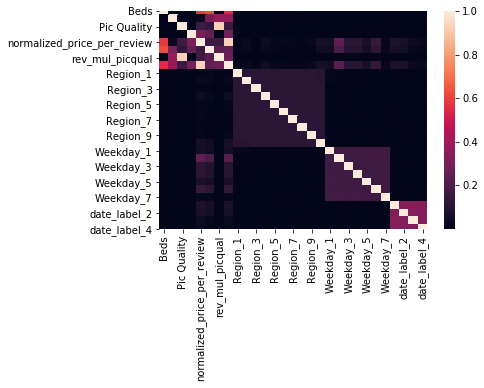

                                 Beds    Review  Pic Quality    Accept  \
Beds                         1.000000  0.001195     0.000872  0.003853   
Review                       0.001195  1.000000     0.002318  0.002587   
Pic Quality                  0.000872  0.002318     1.000000  0.001084   
Accept                       0.003853  0.002587     0.001084  1.000000   
normalized_price_per_review  0.587162  0.023703     0.163539  0.314587   
normalized_perbed_price      0.627173  0.315069     0.132480  0.257628   
rev_mul_picqual              0.000287  0.367488     0.926078  0.001792   
normalized_price             0.549888  0.368976     0.153774  0.295958   
Region_1                     0.003540  0.000370     0.002399  0.001131   
Region_2                     0.003524  0.001365     0.002495  0.001807   
Region_3                     0.007056  0.009353     0.003084  0.004382   
Region_4                     0.005402  0.002699     0.001924  0.002644   
Region_5                     0.002995 

In [11]:
#绘出各个特征之间相关系数
import seaborn as sns
corrmat=train.corr().abs()
sns.heatmap(corrmat)
plt.show()
print(corrmat)

## 平衡数集

In [12]:
#平衡正负样本
pos_num=len(train[train['Accept']==1])
neg_num=len(train[train['Accept']==0])

In [13]:
from imblearn.over_sampling import SMOTE
from sklearn import model_selection
#features =train.columns.drop("Accept")
x=train
x=train.drop(['Accept'],axis=1)
y=train['Accept']
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.3,random_state=1234)
#over_samples=SMOTE(random_state=1234)
#over_samples_x,over_samples_y=over_samples.fit_sample(x_train,y_train)




## 训练和预测

In [15]:
#XGBoost来训练模型
import xgboost as xgb
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,accuracy_score, \
                            precision_score,recall_score, roc_auc_score

#XGBoost来训练训练集
xgb=xgb.XGBClassifier(learning_rate=0.1,
                      n_estimators=140,
                      max_depth=2,
                      min_child_weight=2,
                      gamma=0.5,
                      subsample=0.8,
                      objective='binary:logistic',
                      seed=27,
                      scale_pos_weight=neg_num/pos_num,)
#xgb.fit(over_samples_x,over_samples_y)
xgb.fit(x_train,y_train)



XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=140, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=27, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=2.699319325244155, seed=27,
              subsample=0.8, tree_method=None, validate_parameters=False,
              verbosity=None)

## 模型评价

In [16]:
scores=cross_val_score(xgb,x_train,y_train,cv=5,scoring='roc_auc')
print('AUC均值：%.6f\n'%(scores.mean()))

AUC均值：0.788377

